In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

1.  Считать данные по ссылке

In [3]:
df_items = pd.read_csv("dataset\\KION_DATASET\\data_en\\items_en.csv")
df_items = df_items.drop('Unnamed: 0', axis=1)
df_items.head()

,item_id,content_type,title,title_orig,release_year,genres,countries,for_kids,age_rating,studios,description,keywords,actors_translated,actors_transliterated,directors_translated,transliterated
0,10711,film,Talk to her,Hable con ella,2002.0,"drama, foreign, detective, melodrama",Spain,NaN,16.0,NaN,"Marco, a journalist, interviews the famous Tor...","Talk, her, 2002, Spain, friends, love, strong,...","Adolfo Fernández, Ana Fernández, Dario Grandin...","Adol'fo Fernandes, Ana Fernandes, Dario Grandi...",Pedro Almodovar,Pedro Al'modovar
1,2508,film,Naked Peppers,Search Party,2014.0,"foreign, adventure, comedy",USA,NaN,16.0,NaN,The main character has learned not to invite h...,"Naked, Peppers, 2014, USA, friends, weddings, ...","Adam Palley, Brian Huskey, JB Smoove, Jason Ma...","Adam Palli, Brajan Haski, Dzh.B. Smuv, Dzhejso...",Scott Armstrong,Skot Armstrong
2,10716,film,Tactical force,Tactical Force,2011.0,"crime, foreign, thrillers, action, comedy",Canada,NaN,16.0,NaN,"Professional wrestler Steve Austin (""All or No...","Tactical, Force, 2011, Canada, bandits, gangst...","Adrian Holmes, Darren Shalavi, Jerry Wasserman...","Adrian Holms, Darren Shalavi, Dzherri Vasserma...",Adam P. Caltraro,Adam P. Kaltraro
3,7868,film,45 years old,45 Years,2015.0,"drama, foreign, melodrama",UK,NaN,16.0,NaN,"Charlotte Rampling, Tom Courtney, Geraldine Ja...","45, years, 2015, United Kingdom, marriage, lif...","Alexandra Riddleston-Barrett, Geraldine James,...","Aleksandra Riddlston-Barrett, Dzheral'din Dzhe...",By Andrew Hay,Endrju Hej
4,16268,film,Everything Solves in a Moment,NaN,1978.0,"drama, sport, soviet, melodrama",USSR,NaN,12.0,Lenfilm,The circle of her mentors and the most loyal f...,"Everything that decides, moment, 1978, USSR, s...","Aleksandr Abdulov, Aleksandr Demyanenko, Alexe...","Aleksandr Abdulov, Aleksandr Dem'janenko, Alek...",Victor Sadovsky,Viktor Sadovskij


In [4]:
df_users = pd.read_csv("dataset\\KION_DATASET\\data_en\\users_en.csv")
df_users = df_users.drop('Unnamed: 0', axis=1)
df_users.head()

,user_id,age,income,sex,kids_flg
0,973171,age_25_34,income_60_90,M,1
1,962099,age_18_24,income_20_40,M,0
2,1047345,age_45_54,income_40_60,F,0
3,721985,age_45_54,income_20_40,F,0
4,704055,age_35_44,income_60_90,F,0


In [5]:
df_interactions = pd.read_csv("dataset\\KION_DATASET\\interactions.csv")
df_interactions['last_watch_dt'] = pd.to_datetime(df_interactions['last_watch_dt'])
df_interactions.head()

,user_id,item_id,last_watch_dt,total_dur,watched_pct
0,176549,9506,2021-05-11,4250,72.0
1,699317,1659,2021-05-29,8317,100.0
2,656683,7107,2021-05-09,10,0.0
3,864613,7638,2021-07-05,14483,100.0
4,964868,9506,2021-04-30,6725,100.0


In [6]:
df_items['genres_parsed'] = df_items['genres'].apply(lambda x: list(str(x).split(',')))
df_items['keywords_parsed'] = df_items['keywords'].apply(lambda x: list(str(x).split(',')))
df_items['actors_translated_parsed'] = df_items['actors_translated'].apply(lambda x: list(str(x).split(',')))
df_items['directors_translated_parsed'] = df_items['directors_translated'].apply(lambda x: list(str(x).split(',')))

2. Провести EDA  (разведочный анализ данных)


In [7]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15963 entries, 0 to 15962
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   item_id                      15963 non-null  int64  
 1   content_type                 15963 non-null  object 
 2   title                        15961 non-null  object 
 3   title_orig                   11218 non-null  object 
 4   release_year                 15865 non-null  float64
 5   genres                       15963 non-null  object 
 6   countries                    15963 non-null  object 
 7   for_kids                     566 non-null    float64
 8   age_rating                   15961 non-null  float64
 9   studios                      1065 non-null   object 
 10  description                  15963 non-null  object 
 11  keywords                     15534 non-null  object 
 12  actors_translated            13344 non-null  object 
 13  actors_translite

In [8]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840197 entries, 0 to 840196
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   user_id   840197 non-null  int64 
 1   age       826102 non-null  object
 2   income    825421 non-null  object
 3   sex       826366 non-null  object
 4   kids_flg  840197 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 32.1+ MB


In [9]:
df_interactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1594786 entries, 0 to 1594785
Data columns (total 5 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   user_id        1594786 non-null  int64         
 1   item_id        1594786 non-null  int64         
 2   last_watch_dt  1594786 non-null  datetime64[ns]
 3   total_dur      1594786 non-null  int64         
 4   watched_pct    1594519 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 60.8 MB


In [10]:
def truncate_column_name(name, max_length=10):
    """
    Обрезает название столбца до максимальной длины
    """
    if len(str(name)) <= max_length:
        return str(name)
    return str(name)[:max_length-3] + "..."

def plot_boxplots(df):
    """
    Выводит boxplot для всех численных столбцов в DataFrame
    """
    # Выбираем только численные колонки
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    
    if len(numeric_columns) == 0:
        print("В DataFrame нет численных столбцов")
        return
    
    # Определяем количество строк и столбцов для subplot
    n_cols = 3
    n_rows = (len(numeric_columns) + n_cols - 1) // n_cols
    
    # Создаем grid subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    
    # Преобразуем axes в плоский массив для единообразной обработки
    if n_rows == 1 and n_cols == 1:
        axes = np.array([axes])
    elif n_rows == 1 or n_cols == 1:
        axes = axes.flat
    else:
        axes = axes.flatten()
    
    # Строим boxplot для каждого численного столбца
    for i, col in enumerate(numeric_columns):
        if i < len(axes):
            axes[i].boxplot(df[col].dropna())
            truncated_name = truncate_column_name(col)
            axes[i].set_title(f'Boxplot: {truncated_name}')
            axes[i].set_ylabel('Values')
    
    # Убираем лишние subplots
    for i in range(len(numeric_columns), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()

def plot_histograms(df):
    """
    Выводит гистограммы для всех столбцов (включая нечисловые)
    """
    # Все колонки
    all_columns = df.columns
    
    if len(all_columns) == 0:
        print("DataFrame пустой")
        return
    
    # Определяем количество строк и столбцов для subplot
    n_cols = 3
    n_rows = (len(all_columns) + n_cols - 1) // n_cols
    
    # Создаем grid subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    
    # Преобразуем axes в плоский массив для единообразной обработки
    if n_rows == 1 and n_cols == 1:
        axes = np.array([axes])
    elif n_rows == 1 or n_cols == 1:
        axes = axes.flat
    else:
        axes = axes.flatten()
    
    # Строим гистограммы для каждого столбца
    for i, col in enumerate(all_columns):
        if i < len(axes):
            truncated_name = truncate_column_name(col)
            
            # Для числовых данных
            if pd.api.types.is_numeric_dtype(df[col]):
                axes[i].hist(df[col].dropna(), bins=30, alpha=0.7, edgecolor='black')
                axes[i].set_title(f'Histogram: {truncated_name}')
                axes[i].set_xlabel('Values')
                axes[i].set_ylabel('Frequency')
            # Для категориальных данных
            else:
                value_counts = df[col].value_counts().head(10)  # Берем топ-10 значений
                
                # Обрезаем имена категорий для подписей на оси X
                truncated_labels = [truncate_column_name(str(label)) for label in value_counts.index]
                
                axes[i].bar(range(len(truncated_labels)), value_counts.values)
                axes[i].set_title(f'Bar chart: {truncated_name}')
                axes[i].set_xlabel('Categories')
                axes[i].set_ylabel('Count')
                axes[i].set_xticks(range(len(truncated_labels)))
                axes[i].set_xticklabels(truncated_labels, rotation=45, ha='right')
    
    # Убираем лишние subplots
    for i in range(len(all_columns), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()

def create_cluster_model(df, n_clusters=3, random_state=42):
    """
    Создает модель кластеризации и визуализирует результат в 2D
    """
    # Выбираем только численные колонки и удаляем пропуски
    numeric_df = df.select_dtypes(include=[np.number]).dropna()
    
    if len(numeric_df) == 0:
        print("Нет данных для кластеризации")
        return None, None
    
    if len(numeric_df) < n_clusters:
        print(f"Недостаточно данных для {n_clusters} кластеров")
        return None, None
    
    # Стандартизируем данные
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numeric_df)
    
    # Создаем модель кластеризации K-means
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init=10)
    clusters = kmeans.fit_predict(scaled_data)
    
    # Уменьшаем размерность до 2D с помощью PCA
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(scaled_data)
    
    # Создаем график
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], 
                         c=clusters, cmap='viridis', alpha=0.6)
    plt.colorbar(scatter, label='Cluster')
    plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
    plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
    plt.title(f'K-means Clustering (n_clusters={n_clusters})')
    plt.grid(True, alpha=0.3)
    
    # Добавляем центроиды кластеров
    centroids = pca.transform(kmeans.cluster_centers_)
    plt.scatter(centroids[:, 0], centroids[:, 1], 
               marker='X', s=200, c='red', label='Centroids')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Выводим информацию о кластерах
    cluster_info = pd.DataFrame({
        'cluster': range(n_clusters),
        'size': [sum(clusters == i) for i in range(n_clusters)]
    })
    print("Информация о кластерах:")
    print(cluster_info)
    
    return kmeans, pca

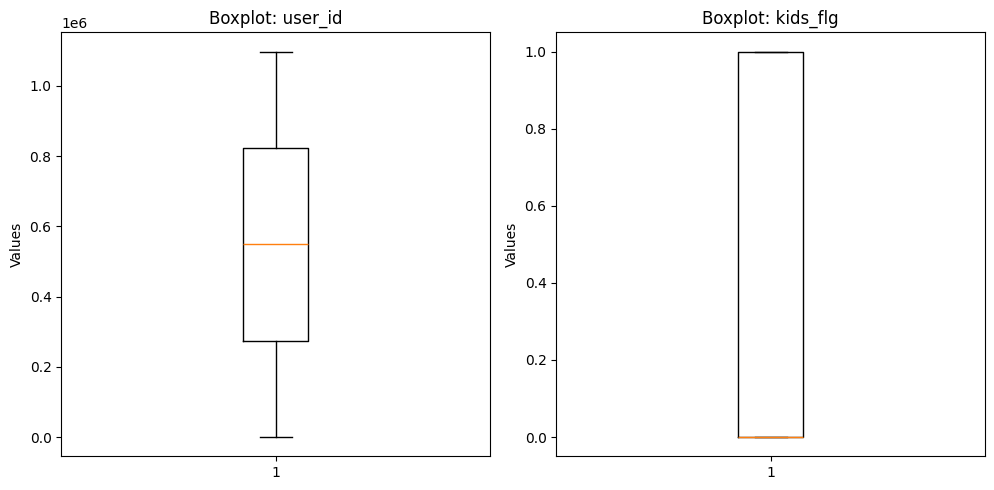

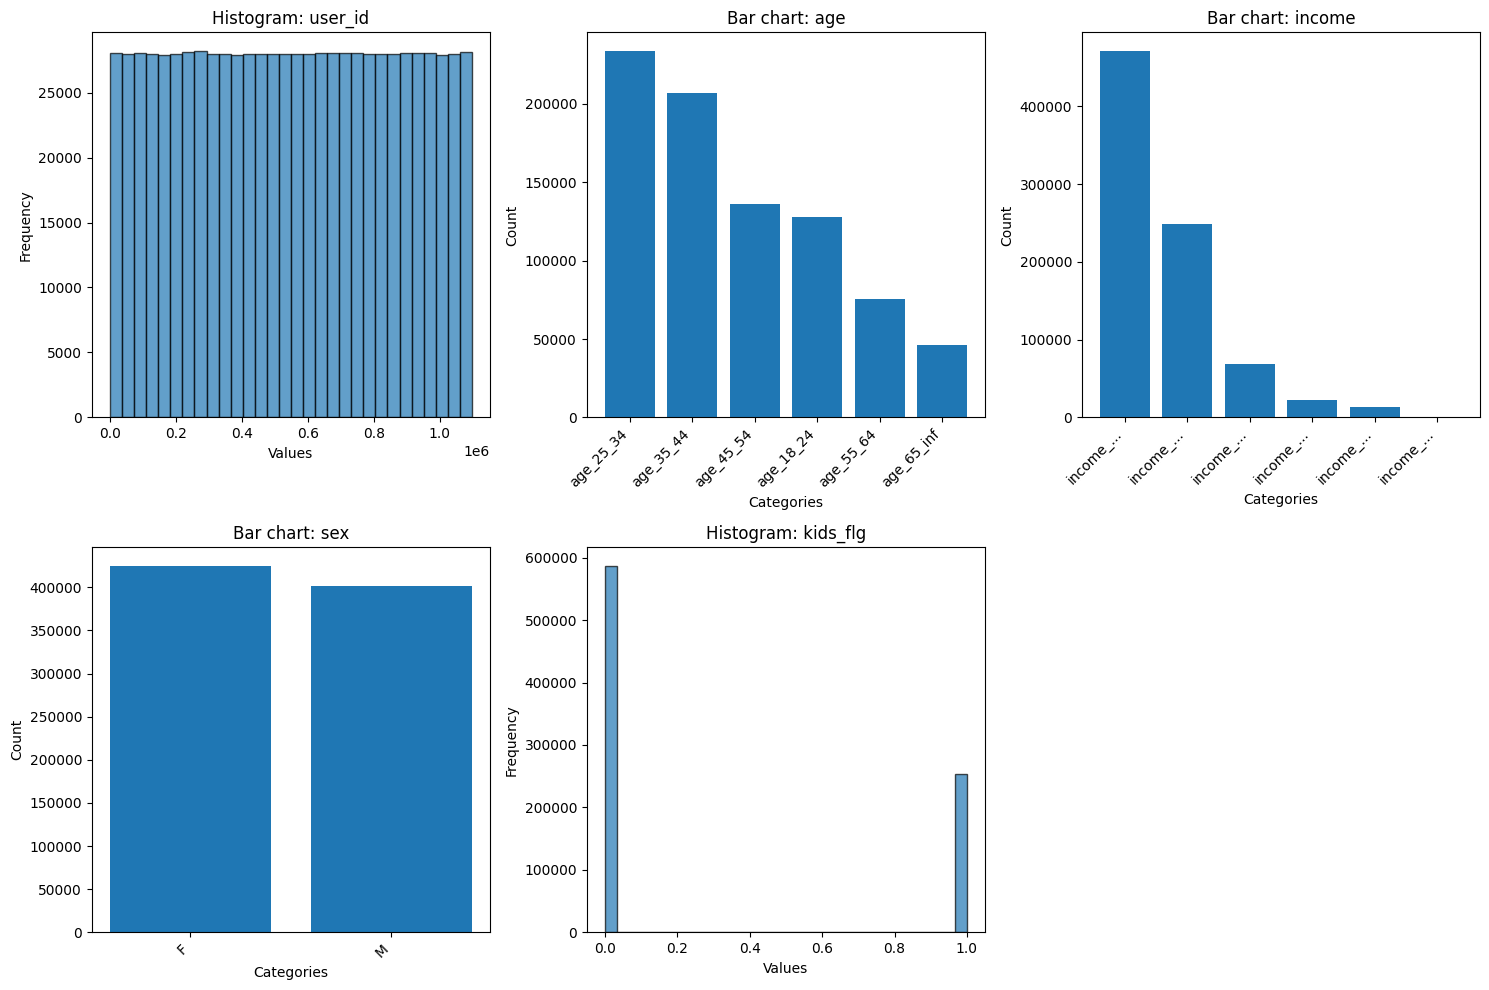

In [11]:
plot_boxplots(df_users)
plot_histograms(df_users)
# create_cluster_model(df_users)

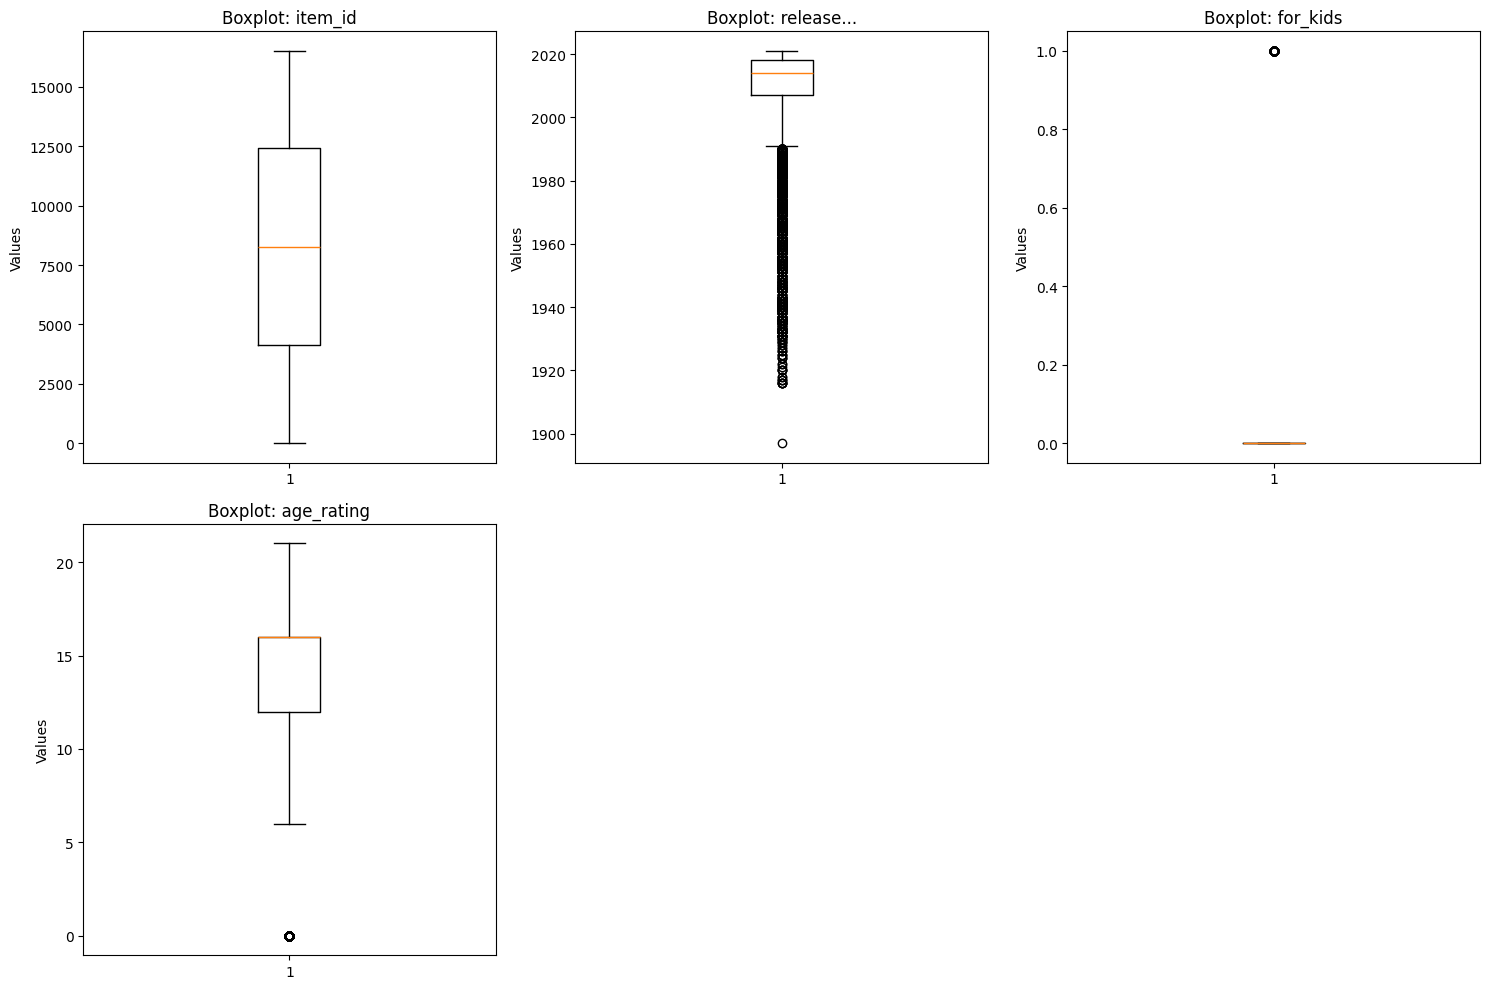

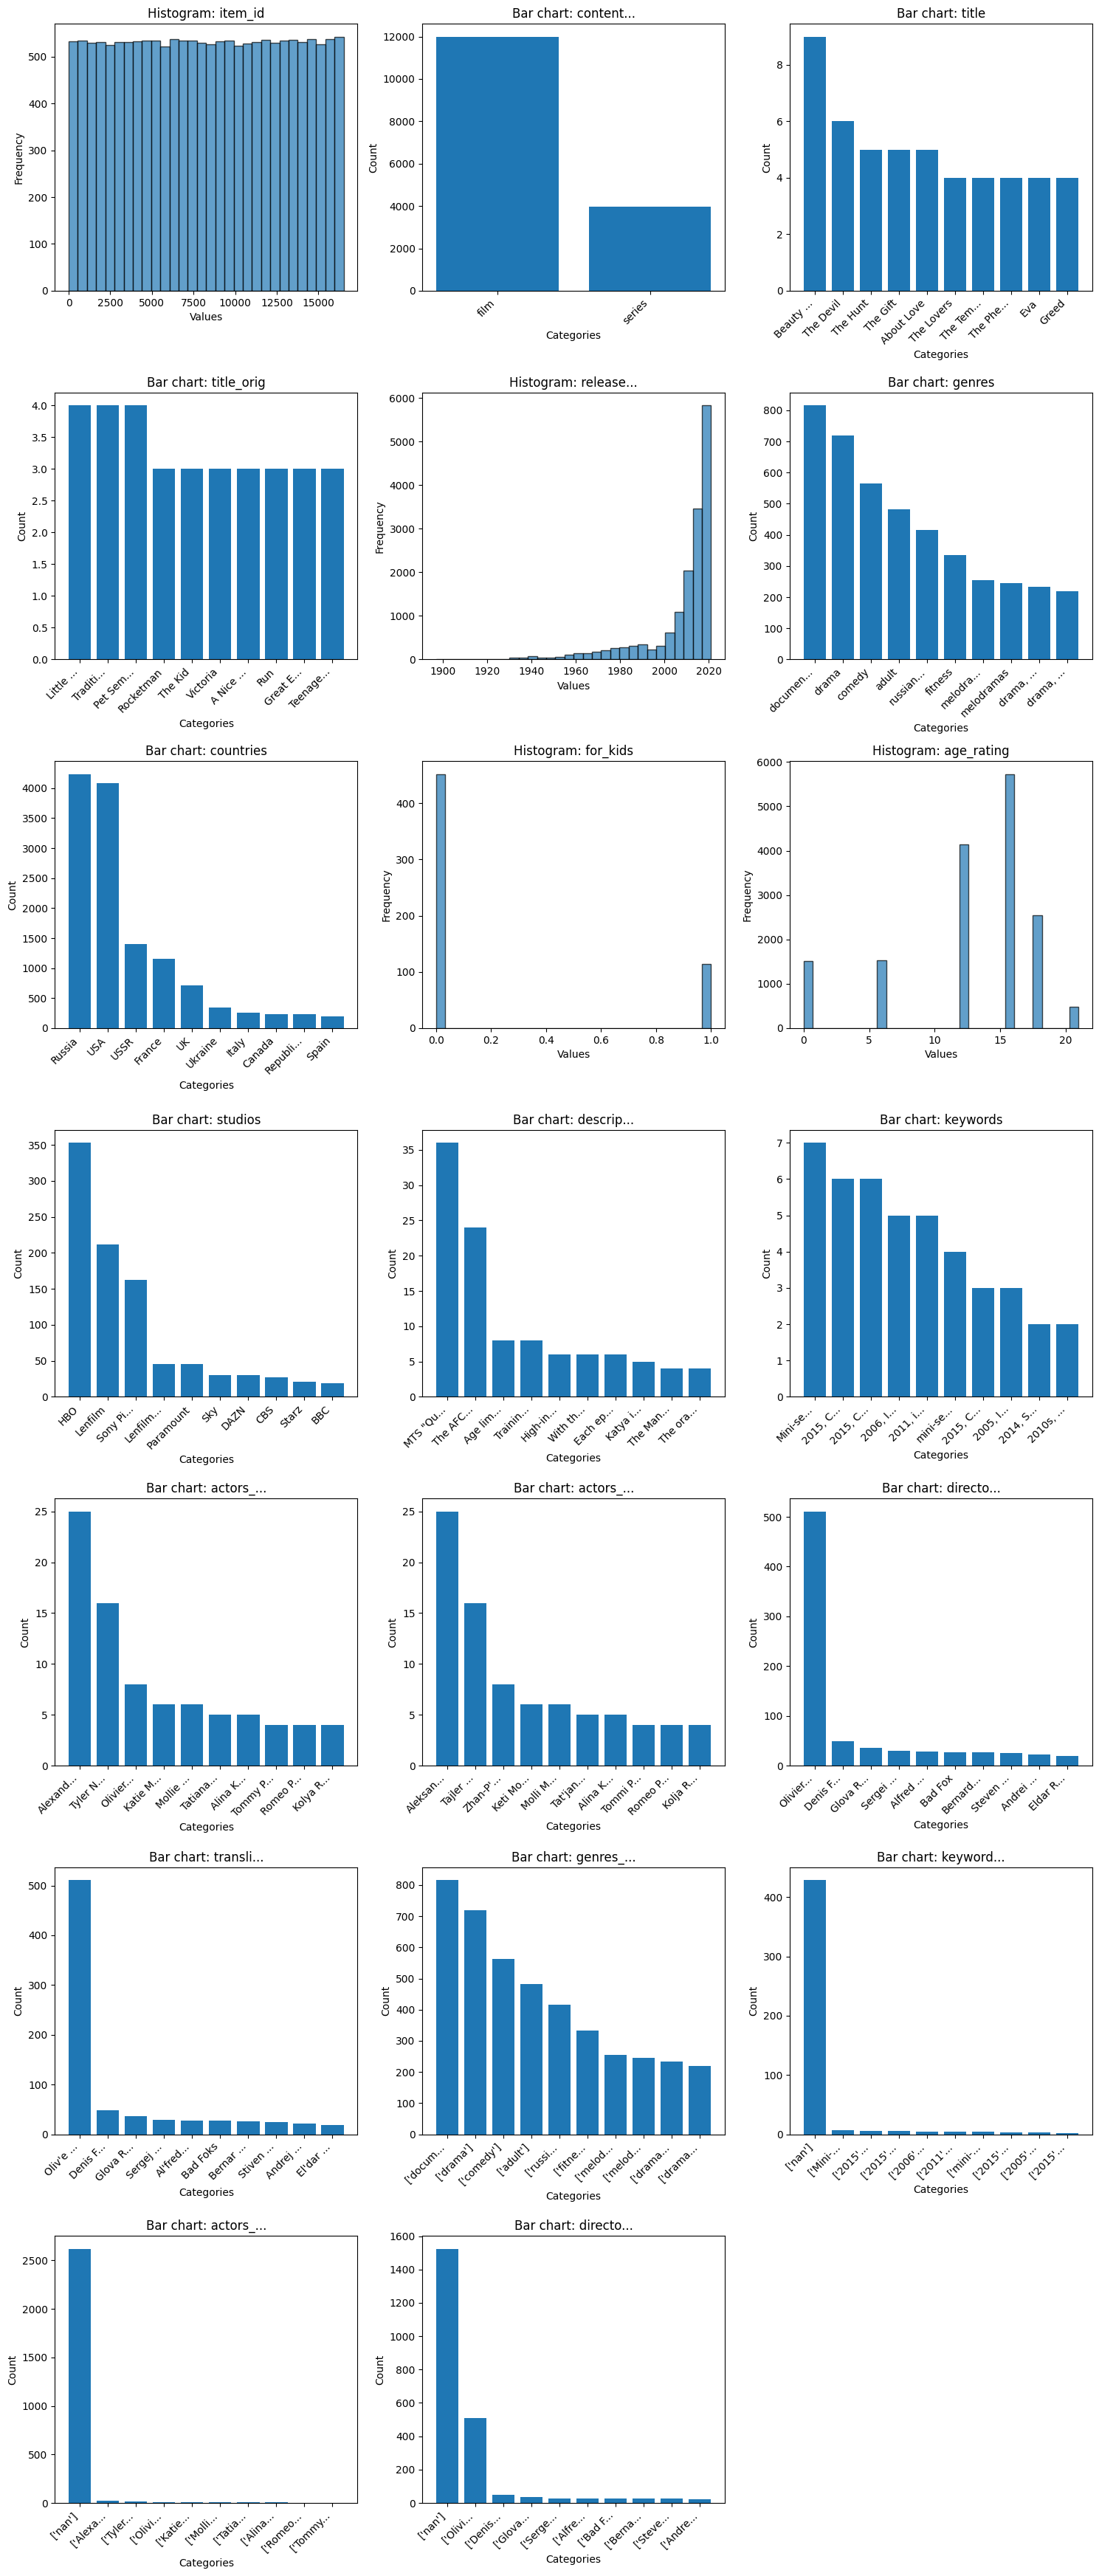

In [12]:
plot_boxplots(df_items)
plot_histograms(df_items)
# create_cluster_model(df_items)

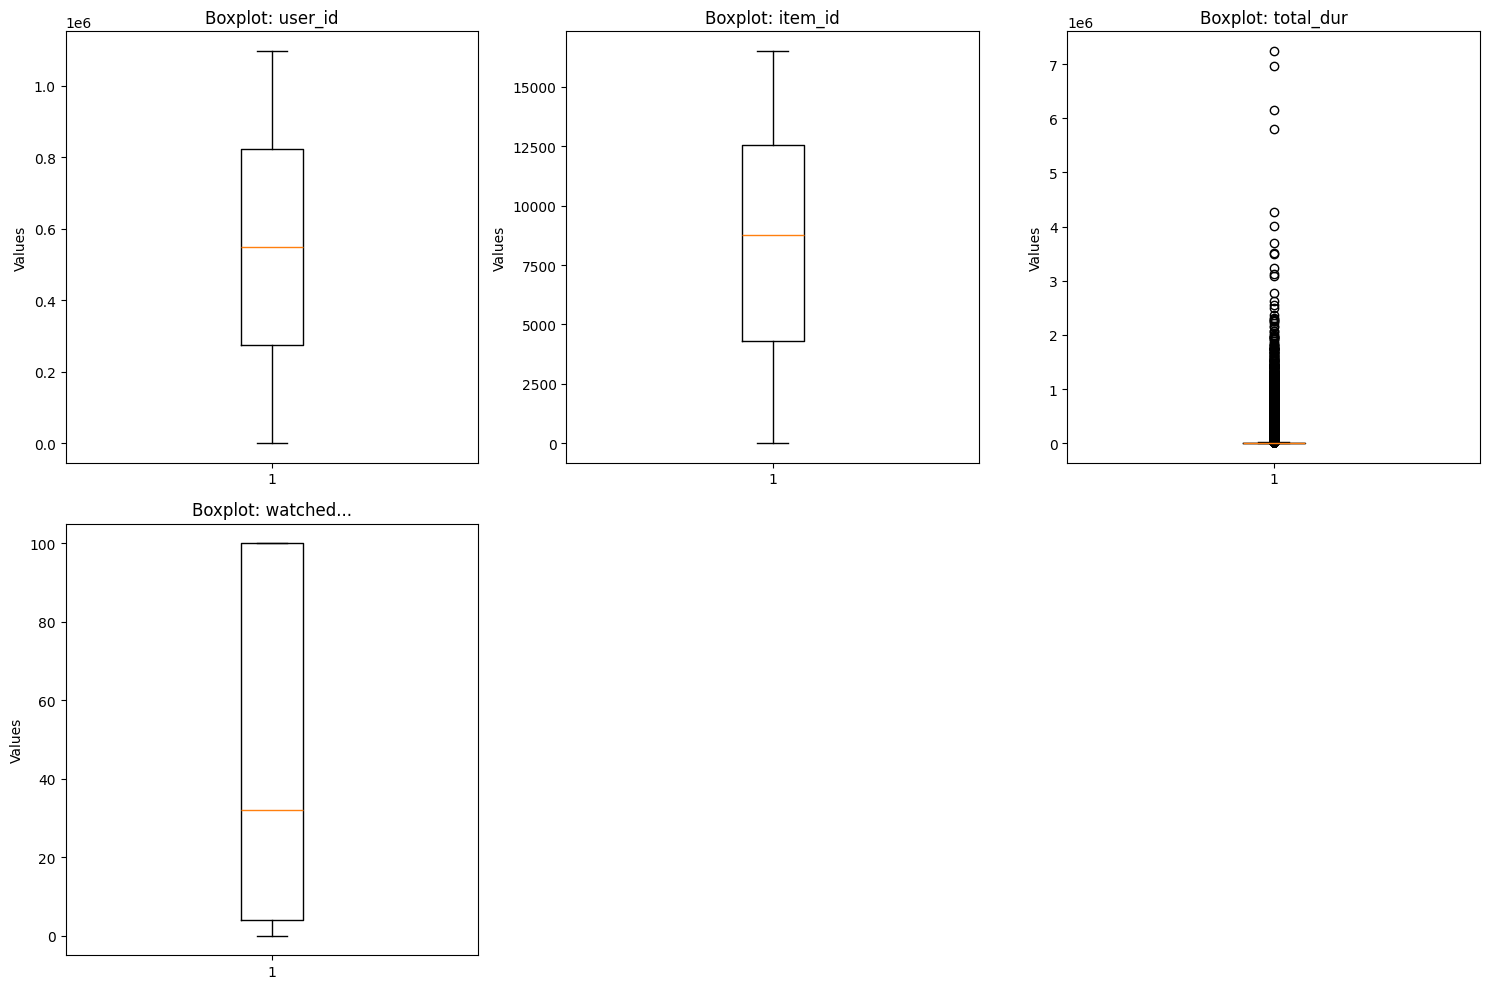

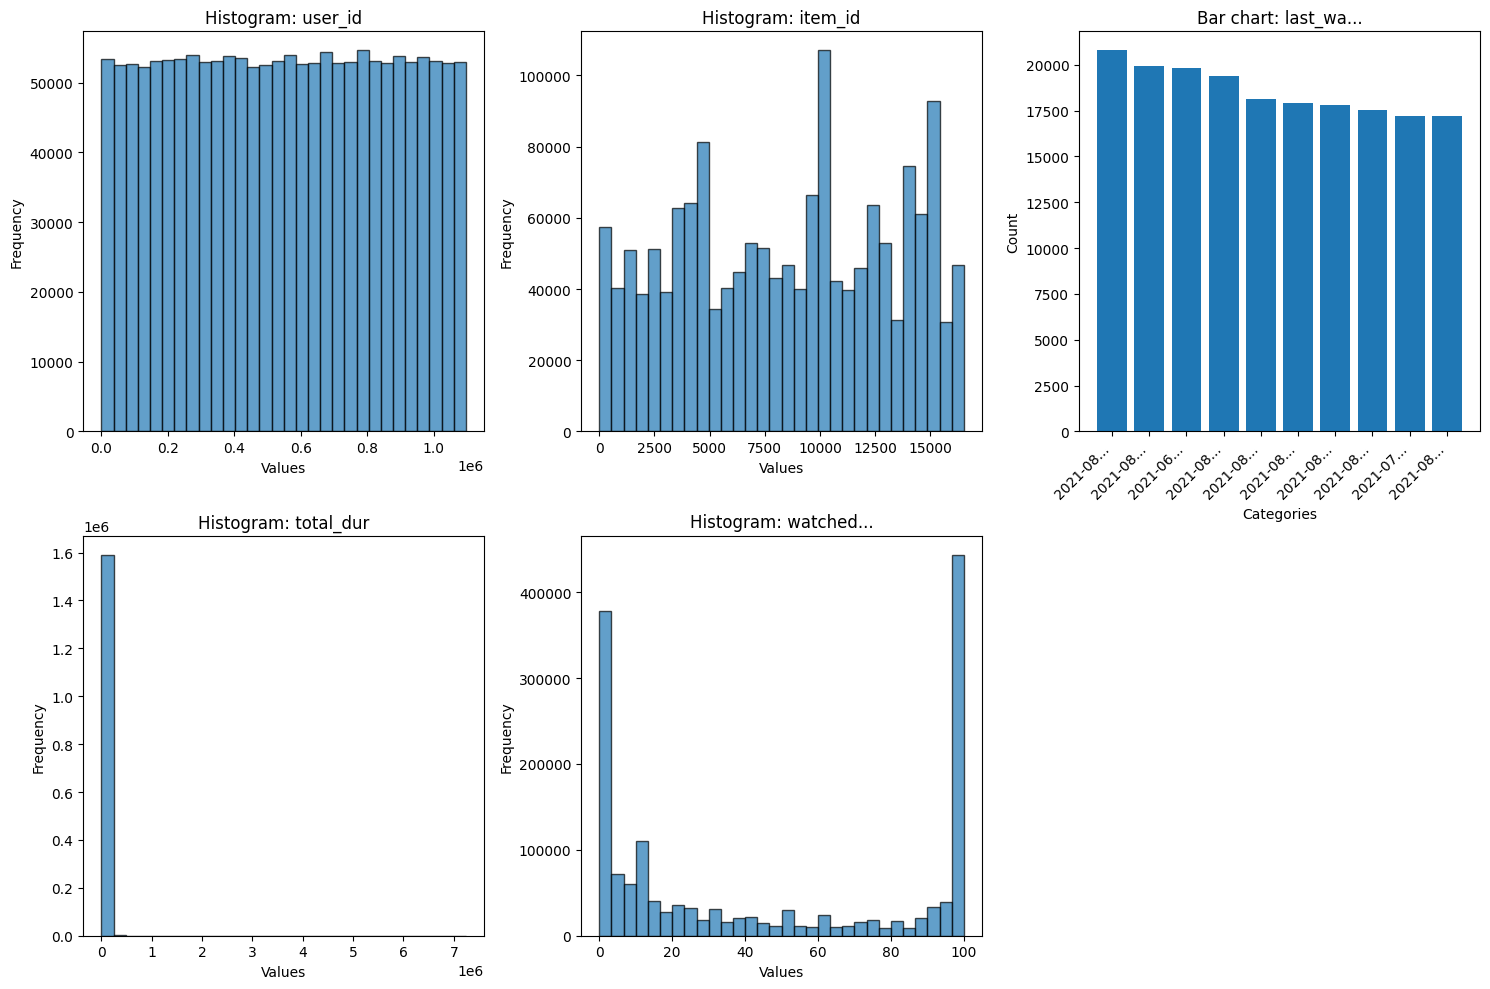

In [13]:
plot_boxplots(df_interactions)
plot_histograms(df_interactions)
# create_cluster_model(df_interactions)

3.  сформировать набор данных для обучения
4. Разделить на train/test  (test - последняя неделя)

In [14]:
test_size_weeks = 3
df_interactions_test = df_interactions[df_interactions['last_watch_dt'].max() - df_interactions['last_watch_dt'] < np.timedelta64(21) ]
df_interactions_train = df_interactions[df_interactions['last_watch_dt'].max() - df_interactions['last_watch_dt'] >= np.timedelta64(21) ]
print(f"length of df_interactions_test: {len(df_interactions_test)}")
print(f"length of df_interactions_train: {len(df_interactions_train)}")

length of df_interactions_test: 20785
length of df_interactions_train: 1574001


In [ ]:
mas = df_interactions_test['user_id'].unique()
mmas = []
for i in mas:
    l = len(df_interactions_train[df_interactions_train['user_id'] == i] )
    if  l > 1 and l < 20:
        mmas.append(True)
    else:
        mmas.append(False)


In [19]:
mas[mmas]

array([ 203219,  626036, 1029980, ...,  657510,  824923,  172667],
      shape=(8440,))

In [13]:
users_with_views = df_interactions_test['user_id'].unique()
all_users = df_users['user_id'].unique()

flags = np.isin(users_with_views, all_users)
users_with_views = users_with_views[flags]

In [82]:
def precision_at_k(recommended_list, watched_list, k=5):
    
    watched_list = np.array(watched_list)
    recommended_list = np.array(recommended_list)
    
    #assert len(watched_list) > len(recommended_list)
    watched_list = watched_list  # Тут нет [:k] !!
    recommended_list = recommended_list[:k]
    
    flags = np.isin(watched_list, recommended_list)
    
    precision = flags.sum() / len(recommended_list)
    
    
    return precision

def ap_k(recommended_list, watched_list, k=5):
    """
    Вычисляет Average Precision at k (AP@k)

    Parameters:
    recommended_list (list или np.array): Ранжированный список рекомендаций
    watched_list (list или np.array): Список релевантных (просмотренных) элементов
    k (int): Глубина оценки (по умолчанию 5)

    Returns:
    float: Значение AP@k
    """
    # Если recommended_list двумерный (содержит пары [item_id, weight]), 
    # извлекаем только item_id из первого столбца
    recommended_list = np.array(recommended_list)
    if recommended_list.ndim == 2:
        recommended_list = recommended_list[:, 0]  # Берем только item_id
    
    watched_list = np.array(watched_list)
    recommended_list = recommended_list[:k]  # ✅ Ограничиваем k рекомендациями
    
    # Создаем булев массив совпадений
    flags = np.isin(recommended_list, watched_list)
    
    # Если в рекомендациях нет релевантных элементов, возвращаем 0
    relevant_count = np.sum(flags)
    if relevant_count == 0:
        return 0.0
    
    # Вычисляем AP@k
    sum_precision = 0.0
    for i in range(len(recommended_list)):
        if flags[i]:  # ✅ Теперь flags[i] - скалярное булево значение
            # Precision at k вычисляется для текущей глубины i+1
            p_k = np.sum(flags[:i+1]) / (i+1)
            sum_precision += p_k
    
    # Делим на количество релевантных элементов в топ-k
    ap_result = sum_precision / relevant_count
    
    return ap_result

def map_k(recommended_list, watched_list, k=5, u=1):
    sum_ = 0
    l = min(len(watched_list), u)
    for i in range(l):
        sum_ += ap_k(recommended_list[i], watched_list[i], k)
    result = sum_ / l
    return result

In [15]:
def progress_bar(current, total, bar_length=50, append=""):
    fraction = current / total
    arrow = int(fraction * bar_length - 1) * '=' + '>'
    padding = (bar_length - len(arrow)) * ' '
    
    progress = f'Progress: [{arrow}{padding}] {int(fraction*100)}%\t{current}/{total}' + append
    print(progress, end='\r')
    
    if current == total: 
        print()

In [ ]:
def count_avg_MAP_for_recommendation(users_with_views, df_interactions_train, df_interactions_test, df_items, recommend_func, coefs=[0.5,0.5,0.5]):
    map_10 = 0
    l = len(users_with_views)
    for i, user in enumerate(users_with_views):
        progress_bar(i, l)
        watched_previous_list = df_interactions_train[df_interactions_train["user_id"] == user]
        user_info = df_users[df_users['user_id'] == user]
        items = df_items
        recomendations = recommend_func(user_info, watched_previous_list, df_interactions_train, items, count = 10, coefs=coefs)
        map_10 += ap_k(recomendations, df_interactions_test[df_interactions_test['user_id'] == user]['item_id'])

    map_10 /= len(users_with_views)
    return map_10

def stand(users_with_views, df_interactions_train, df_interactions_test, df_items, recommend_func, *args, **kwargs):
    map_10 = 0
    l = len(users_with_views)
    user = users_with_views[0]
    watched_previous_list = df_interactions_train[df_interactions_train["user_id"] == user]
    user_info = df_users[df_users['user_id'] == user]
    items = df_items
    recomendations = recommend_func(user_info, watched_previous_list, df_interactions_train, items, count = 10)
    # map_10 += ap_k(recomendations, df_interactions_test[df_interactions_test['user_id'] == user]['item_id'])

    # map_10 /= len(users_with_views)
    # return map_10

5. Сделать рекомендации  
5.1 Random  

In [17]:
from random import randint
def recommend_random(user_info, watched_previous_list, df_interactions_train, items, count = 10, *args, **kwargs):
    return items['item_id'].sample(n=count, replace=True).tolist()

In [18]:
map_10 = count_avg_MAP_for_recommendation(users_with_views, df_interactions_train, df_interactions_test, df_items, recommend_random)
print()
print(map_10)

Progress: [================================================> ] 99%	13446/13447
0.00010535187526337968



5.2 Popular  

In [18]:
def recommend_popular(user_info, watched_previous_list, df_interactions_train, items, count = 10, *args, **kwargs):
    global _dec
    if _dec == None:
        _dec = df_interactions_train.groupby('item_id').size().reset_index(name='count_elements').sort_values(by='count_elements', ascending=False)[:count]['item_id'].tolist()
    return _dec

In [20]:
_dec = None
map_10 = count_avg_MAP_for_recommendation(users_with_views, df_interactions_train, df_interactions_test, df_items, recommend_popular)
_dec = None
print()
print(map_10)

Progress: [================================================> ] 99%	13446/13447
0.06669703279541958



5.3 TopPopular ( personal popular + Popular)  

In [19]:
def recommend_top_popular(user_info, watched_previous_list, df_interactions_train, items, count = 10, person_koeff = 0.5, *args, **kwargs):
    grouped_watched_previous_list = watched_previous_list.groupby('item_id').size().reset_index(name='count_elements').sort_values(by='count_elements', ascending=False)[:count*2]
    grouped_df_interactions_train = df_interactions_train.groupby('item_id').size().reset_index(name='count_elements').sort_values(by='count_elements', ascending=False)
    
    merged_df = pd.merge(
        grouped_watched_previous_list,
        grouped_df_interactions_train,
        on='item_id',  # Ключ для объединения
        suffixes=('_watched', '_train')  # Суффиксы для столбцов с одинаковыми именами
    )
    merged_df['count_elements_result'] = merged_df['count_elements_watched'] * merged_df['count_elements_train']

    grouped_watched_previous_list = merged_df[["item_id", "count_elements_result"]].copy()
    grouped_watched_previous_list.columns = [["item_id",  "count_elements"]]
    grouped_df_interactions_train = grouped_df_interactions_train[:count*2]
    grouped_df_interactions_train.columns = [["item_id",  "count_elements"]]

    mass_watched = grouped_watched_previous_list['count_elements'].sum()
    mass_train = grouped_df_interactions_train['count_elements'].sum()

    grouped_watched_previous_list['weight'] = np.log(grouped_watched_previous_list['count_elements'] / mass_watched)
    grouped_df_interactions_train['weight'] = np.log(grouped_df_interactions_train['count_elements'] / mass_train)
    united = pd.concat([grouped_watched_previous_list, grouped_df_interactions_train], ignore_index=True)
    united.columns = ['item_id', 'count_elements', 'weight']
    
    res = united.sort_values(by='weight', ascending=False)[:count]
    return res['item_id']

In [22]:
map_10 = count_avg_MAP_for_recommendation(users_with_views, df_interactions_train, df_interactions_test, df_items, recommend_top_popular)

print()
print(map_10) # Для данного датасета рекомендации недействительны из-за уникальности по user_id,item_id в interactions

Progress: [================================================> ] 99%	13446/13447
0.05089735009047877



5.4 Взвешенных Popular   

Метрика MAP@10  

In [20]:

def _recommend_weight_popular(user_info, watched_previous_list, df_interactions_train, items, count=10):
    # 1. Извлечение данных текущего пользователя
    user_age = user_info['age']
    # user_income = user_info['income'].iloc[0]
    # user_sex = user_info['sex'].iloc[0]
    # user_kids = user_info['kids_flg'].iloc[0]
    
    # 2. Рассчёт весов для взаимодействий
    # Пример: вес = продолжительность просмотра * процент просмотра * временной вес
    df_interactions_train = df_interactions_train.copy()
    df_interactions_train['last_watch_dt'] = pd.to_datetime(df_interactions_train['last_watch_dt'])
    
    # Временной вес (новые просмотры важнее)
    max_date = df_interactions_train['last_watch_dt'].max()
    df_interactions_train['days_passed'] = (max_date - df_interactions_train['last_watch_dt']).dt.days
    df_interactions_train['time_weight'] = np.exp(-df_interactions_train['days_passed'] / 30)  # Экспоненциальное затухание
    
    # Вес завершённости просмотра
    df_interactions_train['completion_weight'] = df_interactions_train['watched_pct'] / 100
    
    # Общий вес взаимодействия
    df_interactions_train['interaction_weight'] = (
        df_interactions_train['total_dur'] * 
        df_interactions_train['time_weight'] * 
        df_interactions_train['completion_weight']
    )
    
    # 3. Группировка по item_id для получения взвешенной популярности
    item_popularity = (
        df_interactions_train
        .groupby('item_id')
        .agg({'interaction_weight': 'sum', 'user_id': 'nunique'})
        .rename(columns={'interaction_weight': 'weighted_popularity', 'user_id': 'unique_users'})
        .reset_index()
    )
    
    # 4. Фильтрация уже просмотренных фильмов
    watched_ids = watched_previous_list['item_id'].unique()
    item_popularity = item_popularity[~item_popularity['item_id'].isin(watched_ids)]
    
    # 5. Учёт демографии (пример: усиление веса для контента, подходящего по возрасту)
    items = items.copy()
    items['age_rating'] = items['age_rating'].fillna(0)
    
    # Сопоставление возрастных групп пользователя и рейтинга контента
    age_mapping = {
        'age_18_24': 18, 'age_25_34': 25, 'age_35_44': 35,
        'age_45_54': 45, 'age_55_64': 55, 'age_65_plus': 65
    }
    user_age_num = age_mapping.get(user_age, 25)  # По умолчанию 25
    
    # Усиление веса для подходящего по возрасту контента
    items['age_match'] = items['age_rating'] <= user_age_num
    item_popularity = item_popularity.merge(items[['item_id', 'age_match']], on='item_id', how='left')
    # item_popularity['demographic_weight'] = item_popularity['age_match'].apply(lambda x: 1.5 if x else 1.0)
    item_popularity['demographic_weight'] = np.where(item_popularity['age_match'], 1.5, 1.0)
    
    # Финальный вес = популярность * демографический вес
    item_popularity['final_score'] = item_popularity['weighted_popularity'] * item_popularity['demographic_weight']
    
    # 6. Сортировка и возврат топ-N рекомендаций
    recommendations = (
        item_popularity
        .sort_values('final_score', ascending=False)
        .head(count)
        .merge(items, on='item_id', how='left')
    )
    
    # return recommendations[['item_id', 'title', 'final_score', 'weighted_popularity', 'unique_users']]
    return recommendations['item_id']

In [22]:

def recommend_weight_popular(user_info, watched_previous_list, df_interactions_train, items, count=10, coefs=[0.5,0.5,0.5], *args, **kwargs):
    global rwp
    if len(rwp) < 1:
        items_count = df_interactions_train.groupby(by="item_id")["item_id"].count()
        # items_user_count = df_interactions_train.groupby(by="item_id")["user_id"].nunique()
        items_watched_pct = df_interactions_train.groupby(by="item_id")['watched_pct'].mean()
        items_last_watch_dt = df_interactions_train.groupby(by="item_id")['last_watch_dt'].max()
        x = coefs[0] * np.log10(100*items_count / max(items_count)) + \
            coefs[1] * items_watched_pct / 100 + \
            coefs[2] * (items_last_watch_dt > items_last_watch_dt.max() - np.timedelta64(21))
        # print(df_interactions_train.groupby(by="item_id").count())
        # print(np.array(x.nlargest(10).index))
        rwp = np.array(x.nlargest(10).index)
    return rwp

In [23]:
def get_best_params(users_with_views, df_interactions_train, df_interactions_test, df_items, recommend_func):
    map_10 = 0
    users_with_views = users_with_views[100:125]
    topmap = -1
    best_coeff = []
    arr = np.arange(-1, 2, 0.2)
    l1 = len(arr)
    l2 = len(arr)**2
    l3 = len(arr)**3
    for i1, c1 in enumerate(arr):
        for i2, c2 in enumerate(arr):
            for i3, c3 in enumerate(arr):
                coefs = [c1-1, c2-1,c3-1]

                progress_bar(i1*l2+i2*l1+i3, l3, append=f"\t{topmap} - {best_coeff}")
                
                for i, user in enumerate(users_with_views):
                    watched_previous_list = df_interactions_train[df_interactions_train["user_id"] == user]
                    user_info = df_users[df_users['user_id'] == user]
                    items = df_items
                    recomendations = recommend_func(user_info, watched_previous_list, df_interactions_train, items, count = 10, coefs=coefs)
                    map_10 += ap_k(recomendations, df_interactions_test[df_interactions_test['user_id'] == user]['item_id'])
                map_10 /= len(users_with_views)
                if map_10> topmap:
                    best_coeff = coefs
                    # print(f"{round(topmap,3)} -> {round(map_10,3)}")
                    # print(best_coeff)
                    topmap = map_10
                
    return topmap

In [29]:
# get_best_params(users_with_views, df_interactions_train, df_interactions_test, df_items, recommend_weight_popular)

0.013888888888866023 - 
[np.float64(0.7999999999999994), np.float64(0.1999999999999993), np.float64(0.7999999999999994)]


In [30]:
# categories_mas_names = ['age', 'income', 'sex', 'kids_flg']
# categories_dict = {i:user_info.iloc[0][i] for i in categories_mas_names}
# coefs_dict = { categories_mas_names[i]:val for i, val in enumerate(coefs)}

In [31]:
rwp = []
map_10 = count_avg_MAP_for_recommendation(users_with_views, df_interactions_train, df_interactions_test, df_items, recommend_weight_popular,coefs=[0.8, 0.2, 0.8])
rwp = []
print()
print(map_10)

Progress: [================================================> ] 99%	13446/13447
0.06669703279541958


USER_KNN

In [32]:
np.random.seed(1)
rand_user = np.random.choice(users_with_views)
rand_user

np.int64(397090)

In [24]:
def cosine_distance(vec1, vec2):
    # Приводим к одинаковой длине
    max_len = max(len(vec1), len(vec2))
    v1 = vec1 + [0] * (max_len - len(vec1))
    v2 = vec2 + [0] * (max_len - len(vec2))
    
    # Вычисляем скалярное произведение
    dot_product = sum(x * y for x, y in zip(v1, v2))
    
    # Вычисляем нормы векторов
    norm1 = np.sqrt(sum(x * x for x in v1))
    norm2 = np.sqrt(sum(x * y for x, y in zip(v2, v2)))
    
    # Косинусное расстояние = 1 - косинусная схожесть
    if norm1 == 0 or norm2 == 0:
        return 1.0  # Если один из векторов нулевой
    return 1 - (dot_product / (norm1 * norm2))

In [34]:
watched_previous_list_target = df_interactions_train[df_interactions_train["user_id"] == rand_user]['item_id']
a_watched_previous_list_target = np.array(watched_previous_list_target)
top_users = []
l = len(users_with_views)
for i, user in enumerate(users_with_views):
    progress_bar(i, l)
    if not user == rand_user:
        watched_previous_list = df_interactions_train[df_interactions_train["user_id"] == user]['item_id']
        a_watched_previous_list = np.array(watched_previous_list)
        # print(np.intersect1d(watched_previous_list, watched_previous_list_target))
        # print(np.array(watched_previous_list_target))
        intersect_length = cosine_distance(list(watched_previous_list), list(watched_previous_list_target))
        
        # len(np.intersect1d(watched_previous_list, watched_previous_list_target))
        if len(a_watched_previous_list[[not i in a_watched_previous_list_target for i in a_watched_previous_list]]) != 0:
            top_users.append( (user, intersect_length) )
    
# top_users_arr = np.array(top_users)
# sorted_indices = np.argsort(top_users_arr[:, 1])
# sorted_arr = top_users_arr[sorted_indices]

In [35]:
top_users_arr = np.array(top_users)
sorted_indices = np.argsort(top_users_arr[:, 1])
sorted_arr = top_users_arr[sorted_indices][::-1]
l = len(sorted_arr)
rec_list = []
rrec_list = []
for i, user in enumerate(sorted_arr):
    # print(user[0])
    progress_bar(i, l)
    a_watched_previous_list = np.array(df_interactions_train[df_interactions_train["user_id"] == user[0]]['item_id'])
    # intersection = np.intersect1d(watched_previous_list, watched_previous_list_target)
    # intersection = [not watched_previous_list[ii] in watched_previous_list_target for ii in watched_previous_list.index]
    rec_candidate = a_watched_previous_list[[not i in a_watched_previous_list_target for i in a_watched_previous_list]]
    for i in rec_candidate:
        if not i in rec_list:
            rec_list.append(i)
        rrec_list.append(i)
    # print(a_watched_previous_list[[not i in a_watched_previous_list_target for i in a_watched_previous_list]])
    # if not user == rand_user:
        # watched_previous_list = df_interactions_train[df_interactions_train["user_id"] == user]['item_id']
    #     # print(np.intersect1d(watched_previous_list, watched_previous_list_target))
    #     intersect_length = len(np.intersect1d(watched_previous_list, watched_previous_list_target))
    #     if intersect_length != 0:
    #         top_users.append( (user, intersect_length) )

In [36]:
rec_mas3 = []
for i in rec_list[:50]:
    rec_mas3.append((i, rrec_list.count(i)))
rec_mas3 = np.array(rec_mas3)
sorted_indices_rec = np.argsort(rec_mas3[:, 1])
sorted_arr_rec = rec_mas3[sorted_indices_rec][::-1]
ap_k(sorted_arr_rec[:10][:, 0], df_interactions_test[df_interactions_test['user_id'] == rand_user]['item_id'])
df_interactions_test[df_interactions_test['user_id'] == rand_user]['item_id']


1579475    1844
Name: item_id, dtype: int64

In [25]:
def personal_rec_by_nearest(user_info, watched_previous_list, df_interactions_train, items, count = 10, *args, **kwargs):
    user_id = user_info['user_id'].iloc[0]
    watched_previous_list_target = df_interactions_train[df_interactions_train["user_id"] == user_id]['item_id']
    a_watched_previous_list_target = np.array(watched_previous_list_target)
    top_users = []
    l = len(users_with_views)
    for i, user in enumerate(users_with_views):
        # progress_bar(i, l)
        if not user == user_id:
            watched_previous_list = df_interactions_train[df_interactions_train["user_id"] == user]['item_id']
            a_watched_previous_list = np.array(watched_previous_list)
            intersect_length = cosine_distance(list(watched_previous_list), list(watched_previous_list_target))
            if len(a_watched_previous_list[[not i in a_watched_previous_list_target for i in a_watched_previous_list]]) != 0:
                top_users.append( (user, intersect_length) )
    top_users_arr = np.array(top_users)
    sorted_indices = np.argsort(top_users_arr[:, 1])
    sorted_arr = top_users_arr[sorted_indices][::-1]
    l = len(sorted_arr)
    rec_list = []
    rrec_list = []
    for i, user in enumerate(sorted_arr):
        # progress_bar(i, l)
        a_watched_previous_list = np.array(df_interactions_train[df_interactions_train["user_id"] == user[0]]['item_id'])
        rec_candidate = a_watched_previous_list[[not i in a_watched_previous_list_target for i in a_watched_previous_list]]
        for i in rec_candidate:
            if not i in rec_list:
                rec_list.append(i)
            rrec_list.append(i)
    rec_mas3 = []
    for i in rec_list[:50]:
        rec_mas3.append((i, rrec_list.count(i)))
    rec_mas3 = np.array(rec_mas3)
    sorted_indices_rec = np.argsort(rec_mas3[:, 1])
    sorted_arr_rec = rec_mas3[sorted_indices_rec][::-1]
    return sorted_arr_rec[:count]

In [26]:
def personal_rec_by_nearest_optimized(user_info, watched_previous_list, df_interactions_train, items, count=10, *args, **kwargs):
    user_id = user_info['user_id'].iloc[0]
    
    # 1. ПРЕДВАРИТЕЛЬНАЯ АГРЕГАЦИЯ ДАННЫХ
    # Собираем все взаимодействия один раз
    user_interactions = df_interactions_train.groupby('user_id')['item_id'].apply(set).to_dict()
    target_user_items = user_interactions.get(user_id, set())
    
    # 2. ВЕКТОРИЗОВАННОЕ ВЫЧИСЛЕНИЕ СХОЖЕСТИ
    similarities = []
    target_len = len(target_user_items)
    
    for other_user, other_items in user_interactions.items():
        if other_user == user_id:
            continue
            
        other_len = len(other_items)
        if other_len == 0:
            continue
            
        # Вычисляем пересечение без преобразования в list
        intersection = len(target_user_items & other_items)
        if intersection == 0:
            continue
            
        # Косинусная схожесть
        similarity = intersection / (target_len ** 0.5 * other_len ** 0.5)
        similarities.append((other_user, similarity, other_items - target_user_items))
    
    # 3. СОРТИРОВКА И ОГРАНИЧЕНИЕ РАЗМЕРА
    similarities.sort(key=lambda x: x[1], reverse=True)
    
    # Берем только топ-N похожих пользователей для экономии памяти
    top_similarities = similarities[:1000]
    
    # 4. ЭФФЕКТИВНЫЙ ПОДСЧЕТ ЧАСТОТ
    from collections import Counter
    frequency_counter = Counter()
    
    for _, _, new_items in top_similarities:
        frequency_counter.update(new_items)
    
    # 5. ВОЗВРАТ РЕЗУЛЬТАТА
    return [item for item, _ in frequency_counter.most_common(count)]

In [1]:
# map_10 = count_avg_MAP_for_recommendation(users_with_views, df_interactions_train, df_interactions_test, df_items, personal_rec_by_nearest_optimized)

# print()
# print(map_10)

In [27]:
# Еще более оптимизированная версия с кэшированием
from functools import lru_cache
from collections import defaultdict, Counter

class RecommendationOptimizer:
    def __init__(self, df_interactions_train):
        self.df_interactions_train = df_interactions_train
        self._user_items_cache = None
    
    @property
    def user_items(self):
        if self._user_items_cache is None:
            self._user_items_cache = self.df_interactions_train.groupby('user_id')['item_id'].apply(set).to_dict()
        return self._user_items_cache
    
    def personal_rec_by_nearest_cached(self, user_info, watched_previous_list, df_interactions_train, items, count=10, *args, **kwargs):
        user_id = user_info['user_id'].iloc[0]
        target_items = self.user_items.get(user_id, set())
        
        # Быстрый расчет схожести
        similarities = []
        target_len = len(target_items)
        
        for other_user, other_items in self.user_items.items():
            if other_user == user_id:
                continue
                
            intersection = len(target_items & other_items)
            if intersection > 0:
                similarity = intersection / (target_len * len(other_items)) ** 0.5
                similarities.append((similarity, other_items - target_items))
        
        # Сортировка и агрегация
        similarities.sort(reverse=True)
        
        counter = Counter()
        for similarity, new_items in similarities[:500]:
            counter.update(new_items)
        
        # Получаем рекомендации на основе похожих пользователей
        collab_recs = [item for item, _ in counter.most_common(count)]
        
        # Если рекомендаций меньше count, дополняем популярными
        if len(collab_recs) < count:
            # Получаем популярные рекомендации
            popular_recs = recommend_popular(user_info, watched_previous_list, df_interactions_train, items, count, *args, **kwargs)
            
            # Исключаем уже рекомендованные и просмотренные товары
            existing_items = set(collab_recs) | target_items
            additional_recs = []
            
            for item in popular_recs:
                if item not in existing_items:
                    additional_recs.append(item)
                    existing_items.add(item)
                if len(collab_recs) + len(additional_recs) >= count:
                    break
            
            # Объединяем рекомендации
            collab_recs.extend(additional_recs)
        
        # Возвращаем запрошенное количество
        return collab_recs[:count]

# Использование:
optimizer = RecommendationOptimizer(df_interactions_train)


In [41]:

# map_10 = count_avg_MAP_for_recommendation(users_with_views, df_interactions_train, df_interactions_test, df_items, personal_rec_by_nearest)

map_10 = 0
l = len(users_with_views)
for i, user in enumerate(users_with_views):
    progress_bar(i, l)
    watched_previous_list = df_interactions_train[df_interactions_train["user_id"] == user]
    user_info = df_users[df_users['user_id'] == user]
    items = df_items
    # recomendations = recommend_func(user_info, watched_previous_list, df_interactions_train, items, count = 10, coefs=coefs)
    recomendations = optimizer.personal_rec_by_nearest_cached(user_info, watched_previous_list, df_interactions_train, items, count = 10,)
    map_10 += ap_k(recomendations, df_interactions_test[df_interactions_test['user_id'] == user]['item_id'])

map_10 /= len(users_with_views)

print()
print(map_10)
# recommendations = optimizer.personal_rec_by_nearest_cached(user_info)

Progress: [================================================> ] 99%	13446/13447
0.06582013336308021


KNN по items

In [83]:
def weight_compare_films(item, genres_dict, keywords_dict, actors_dict, directors_dict):
    res_closeness = 0
    # Используем get() для избежания проверок keys()
    for genre in item['genres_parsed']:
        res_closeness += 1 + genres_dict.get(genre, 0)
    for keyword in item['keywords_parsed']:
        res_closeness += 1 + keywords_dict.get(keyword, 0)
    for actor in item['actors_translated_parsed']:
        res_closeness += 1 + actors_dict.get(actor, 0)
    for director in item['directors_translated_parsed']:
        res_closeness += 1 + directors_dict.get(director, 0)
    return res_closeness

def personal_rec_by_nearest_item(user_info, watched_previous_list, df_interactions_train, items, count=10, *args, **kwargs):
    # Сортируем один раз и работаем с индексами
    watched_sorted = watched_previous_list.sort_values(by='watched_pct', ascending=False)
    watched_ids = watched_sorted['item_id'].values
    
    # Инициализация словарей
    genres_dict, keywords_dict, actors_dict, directors_dict = {}, {}, {}, {}
    
    # Фильтруем items по watched_ids одним запросом
    watched_items = items[items['item_id'].isin(watched_ids)]
    
    # Создаем словари без вложенных циклов
    for _, item in watched_items.iterrows():
        for genre in item['genres_parsed']:
            genres_dict[genre] = genres_dict.get(genre, 0) + 1
        for keyword in item['keywords_parsed']:
            keywords_dict[keyword] = keywords_dict.get(keyword, 0) + 1
        for actor in item['actors_translated_parsed']:
            actors_dict[actor] = actors_dict.get(actor, 0) + 1
        for director in item['directors_translated_parsed']:
            directors_dict[director] = directors_dict.get(director, 0) + 1
    
    # Нормализация - вычисляем суммы один раз для каждого словаря
    for dictionary in [genres_dict, keywords_dict, actors_dict, directors_dict]:
        total = sum(dictionary.values())
        if total > 0:
            for key in dictionary:
                dictionary[key] = np.log10(dictionary[key] / total * 100)
    
    # Исключаем просмотренные элементы
    unwatched_items = items[~items['item_id'].isin(watched_ids)]
    
    # Векторизованное вычисление весов
    def calc_weight(row):
        return weight_compare_films(row, genres_dict, keywords_dict, actors_dict, directors_dict)
    
    unwatched_items = unwatched_items.copy()
    unwatched_items['weight'] = unwatched_items.apply(calc_weight, axis=1)
    
    # Сортировка и возврат результата
    result = unwatched_items.nlargest(count, 'weight')[['item_id', 'weight']]
    return result.values

    print(watched_previous_list_sorted.values)
    # print(keywords_dict)
    # print(actors_dict)
    # print(directors_dict)
    # print(watched_previous_list_sorted)

In [ ]:
# stand(users_with_views, df_interactions_train, df_interactions_test, df_items, personal_rec_by_nearest_item)
map_10 = count_avg_MAP_for_recommendation(users_with_views, df_interactions_train, df_interactions_test, df_items, personal_rec_by_nearest_item)

print()
print(map_10)

проверка, чтобы человек посмотрел хотя бы пару фильмов   
убрать непопулярные items   
убрать людей, которые много смотрят   

In [85]:
map_10

np.float64(0.002416895961924593)